In [2]:
!pip install xgboost

In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("C:/Users/MIR FAISAL/Downloads/heart.csv")

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# One Hot Encoding Using Pandas

In [10]:
variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [11]:
df = pd.get_dummies(data = df,prefix = variables,columns = variables)

This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.

In [12]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


now splitting the data into target varibles and features.

In [13]:
features = df.drop(columns = 'HeartDisease',axis = 1)
labels = df['HeartDisease']
print(features)
print(labels)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0     40        140          289          0    172      0.0      0      1   
1     49        160          180          0    156      1.0      1      0   
2     37        130          283          0     98      0.0      0      1   
3     48        138          214          0    108      1.5      1      0   
4     54        150          195          0    122      0.0      0      1   
..   ...        ...          ...        ...    ...      ...    ...    ...   
913   45        110          264          0    132      1.2      0      1   
914   68        144          193          1    141      3.4      0      1   
915   57        130          131          0    115      1.2      0      1   
916   57        130          236          0    174      0.0      1      0   
917   38        138          175          0    173      0.0      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0          

In [14]:
print(len(features))

918


# Splitting The DataSet

In [15]:
X_train, X_val, y_train, y_val = train_test_split(features,labels, train_size = 0.8, random_state = 42)

In [16]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5463


# Building The Model
# 1. Decision Tree

In [17]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # # None means that there is no depth limit.

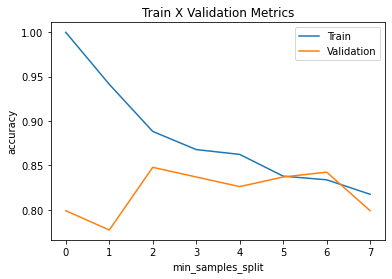

In [18]:
accuracy_list_train = []
accuracy_list_validation = []
for i in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = i, random_state = 42).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_validation.append(accuracy_val)
plt.title('Train X Validation Metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_validation)
plt.legend(['Train','Validation'])

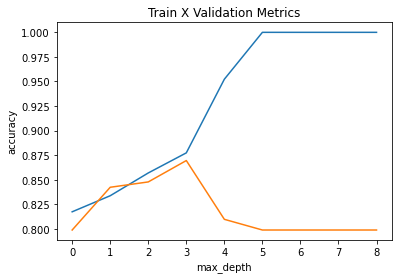

In [19]:
accuracy_list_train = []
accuracy_list_validation = []
for j in max_depth_list:
    model = DecisionTreeClassifier(max_depth = j,random_state = 42).fit(X_train,y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    accuracy_train = accuracy_score(prediction_train , y_train)
    accuracy_val = accuracy_score(prediction_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_validation.append(accuracy_val)
plt.title("Train X Validation Metrics")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_validation)

We can see that in general, reducing `max_depth` can help to reduce overfitting.
- Reducing `max_depth` from 8 to 4 increases validation accuracy closer to training accuracy, while significantly reducing training accuracy.
- The validation accuracy reaches the highest at tree_depth=4. 
- When the `max_depth` is smaller than 3, both training and validation accuracy decreases.  The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set). 
- When the `max_depth` is too high ( >= 5), validation accuracy decreases while training accuracy increases, indicating that the model is overfitting to the training set.

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 4`
- `min_samples_split = 50`

In [20]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = 42).fit(X_train,y_train)

In [21]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8542
Metrics validation:
	Accuracy score: 0.8424


# 2. Random Forest

In [22]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

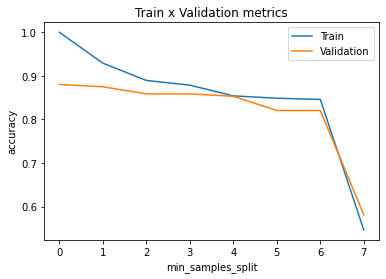

In [24]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

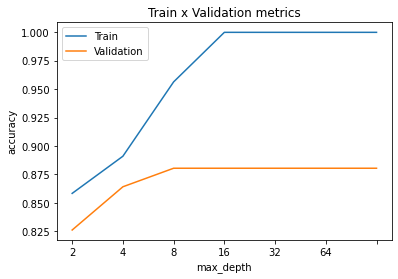

In [25]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

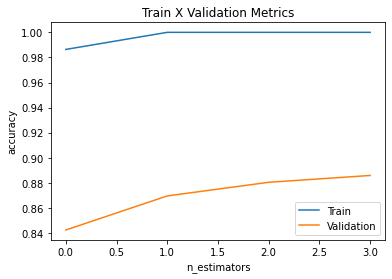

In [27]:
accuracy_list_train = []
accuracy_list_val = []
for estimator in n_estimators_list:
    model = RandomForestClassifier(n_estimators = estimator,random_state = 42).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
plt.title('Train X Validation Metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])    

Let's then fit a random forest with the following parameters:

max_depth: 16
min_samples_split: 10
n_estimators: 100

In [32]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(X_train,y_train)
prediction_train = random_forest_model.predict(X_train)
accuracy_train = accuracy_score(prediction_train,y_train)
prediction_val = random_forest_model.predict(X_val)
accuracy_val = accuracy_score(prediction_val,y_val)

In [33]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_train:.4f}\nMetrics test:\n\tAccuracy score: {accuracy_val:.4f}")

Metrics train:
	Accuracy score: 0.9278
Metrics test:
	Accuracy score: 0.8750


# 3. XG Boost

In [36]:
n = int(len(X_train)* 0.8)
print("The lenght of training Data: ", n)

The lenght of training Data:  587


In [37]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [44]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = 42)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.65141
[1]	validation_0-logloss:0.61289
[2]	validation_0-logloss:0.57971
[3]	validation_0-logloss:0.55172
[4]	validation_0-logloss:0.53175
[5]	validation_0-logloss:0.51401
[6]	validation_0-logloss:0.49884
[7]	validation_0-logloss:0.48808
[8]	validation_0-logloss:0.47906
[9]	validation_0-logloss:0.47016
[10]	validation_0-logloss:0.46099
[11]	validation_0-logloss:0.45347
[12]	validation_0-logloss:0.44867
[13]	validation_0-logloss:0.44370
[14]	validation_0-logloss:0.44137
[15]	validation_0-logloss:0.43769
[16]	validation_0-logloss:0.43645
[17]	validation_0-logloss:0.43211
[18]	validation_0-logloss:0.43149
[19]	validation_0-logloss:0.42899
[20]	validation_0-logloss:0.42878
[21]	validation_0-logloss:0.42753
[22]	validation_0-logloss:0.42596
[23]	validation_0-logloss:0.42669
[24]	validation_0-logloss:0.42381
[25]	validation_0-logloss:0.42547
[26]	validation_0-logloss:0.42418
[27]	validation_0-logloss:0.42022
[28]	validation_0-logloss:0.41854
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Even though we initialized the model to allow up to 500 estimators, the algorithm only fit 43 estimators (over 43 rounds of training).

let's see why:

In [45]:
xgb_model.best_iteration

33

The best round of training was round 33, with a log loss of 4.0988.  
- For 10 rounds of training after that (from round 34 to 43), the log loss was higher than this.
- Since we set `early_stopping_rounds` to 10, then by the 10th round where the log loss doesn't improve upon the best one, training stops.

In [46]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9469
Metrics test:
	Accuracy score: 0.8750
